In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\ojaswitha\OneDrive\Documents\Desktop\EDA\retail_sales_dataset.csv")
df.head()  

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Data Cleaning

In [4]:
df.isnull().sum()
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

C:\Users\ojaswitha\AppData\Local\Temp\ipykernel_10988\2641409576.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
df['Date'] = pd.to_datetime(df['Date'])


Descriptive Statistics

In [6]:
df[['Age', 'Quantity', 'Price per Unit']].mean()
df[['Age', 'Quantity', 'Price per Unit']].median()
df[['Age', 'Quantity', 'Price per Unit']].std()

Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
dtype: float64

Time Series Analysis

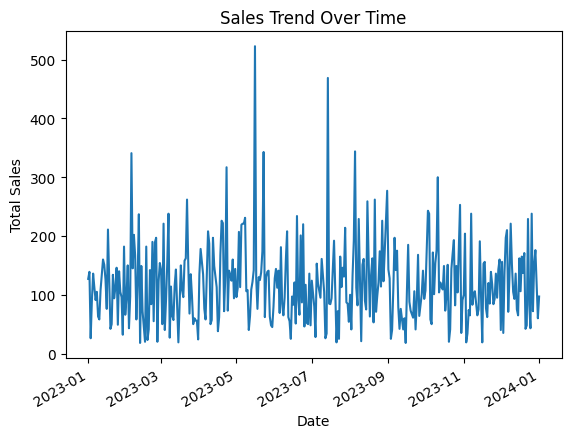

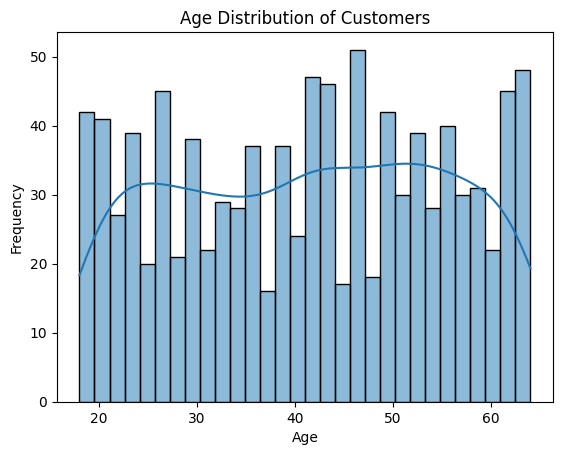

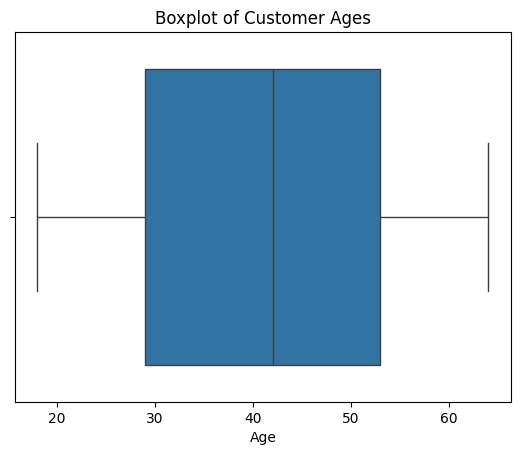

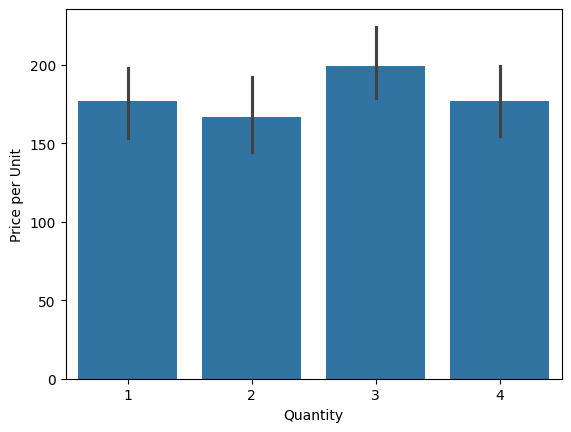

In [7]:
sales_over_time = df.groupby('Date')['Age'].sum()

plt.figure()
sales_over_time.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()
plt.figure()
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
plt.figure()
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Customer Ages")
plt.xlabel("Age")
plt.show()
plt.figure()
df.groupby('Product Category')['Price per Unit'].sum().sort_values(ascending=False)
sns.barplot(x='Quantity', y='Price per Unit', data=df)
plt.show()



Product & Customer Analysis

In [8]:
df.groupby('Product Category')['Price per Unit'].sum().sort_values(ascending=False)


Product Category
Electronics    62210
Clothing       61175
Beauty         56505
Name: Price per Unit, dtype: int64

Category-wise sales

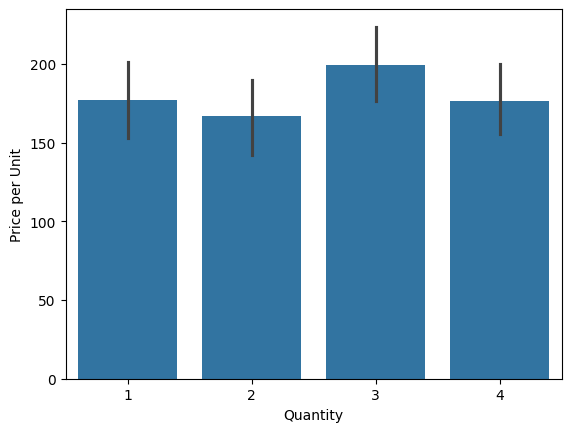

In [9]:
sns.barplot(x='Quantity', y='Price per Unit', data=df)
plt.show()


Gender-wise Spending

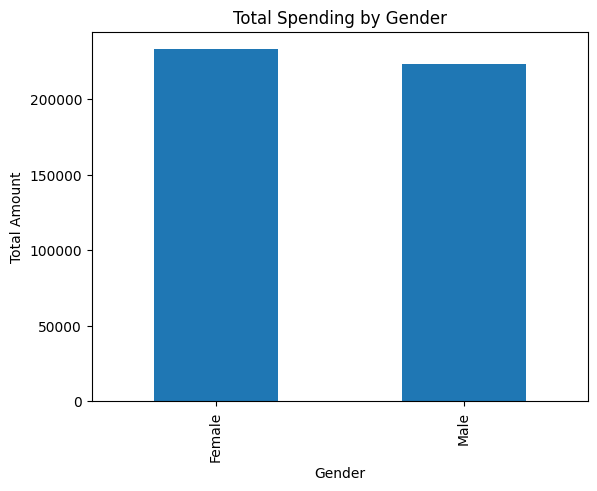

In [10]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()

plt.figure()
gender_sales.plot(kind='bar')
plt.title("Total Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()


Age Distribution

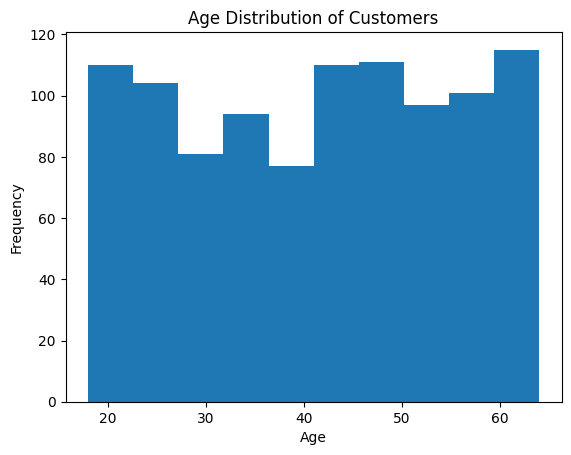

In [11]:
plt.figure()
plt.hist(df['Age'], bins=10)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Quantity vs Total Amount (Scatter Plot)

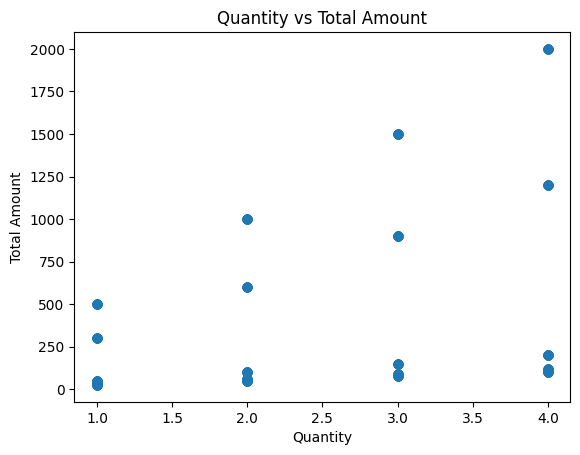

In [12]:
plt.figure()
plt.scatter(df['Quantity'], df['Total Amount'])
plt.title("Quantity vs Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()



Time Series Analysis

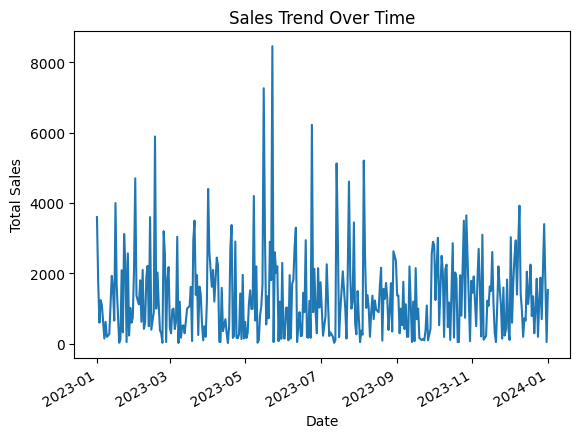

In [13]:
sales_over_time = df.groupby('Date')['Total Amount'].sum()

plt.figure()
sales_over_time.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


Conclusion

Exploratory Data Analysis helped in understanding customer behavior, product performance, and sales trends. These insights can support data-driven decisions to improve retail business performance.